In [1]:
import pystan
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## Call center data set — exponential likelihood with gamma prior


Estimate the number of calls per minute for the 11th hour of the call center data set.

#### Results to compute:

* Posterior 95% confidence interval over λ (check that it matches results in the solution notebook)

* Histogram of posterior λ samples

In [44]:
# Load the data set containing durations between calls arriving at the call center.
# All values are in minutes.
waiting_times_day = np.loadtxt('call-center.csv')

# Split the data into 24 separate series, one for each hour of the day
current_time = 0
waiting_times_per_hour = [[] for _ in range(24)]  # Make 24 empty lists, one per hour
for t in waiting_times_day:
    current_hour = int(current_time // 60)
    current_time += t
    waiting_times_per_hour[current_hour].append(t)

#11th hour
waiting_times_hour = waiting_times_per_hour[11]

#Prior hyperparameters
p_alpha = 1
p_beta = 0.25

data_1 = {
        'p_alpha': p_alpha,
        'p_beta': p_beta,
        'num': len(waiting_times_hour),
         'x': [i for i in waiting_times_hour]}

In [3]:
stan_code_1 = """

// For the data block, I chose to just use the posterior hyperparameters directly as I had calculated it above using the prior hyperparameters and the data

data {
    real<lower=0> p_alpha;  // prior hyperparameter
    real<lower=0> p_beta;   // prior hyperparameter
    int<lower=1> num; // len(data)
    real<lower=0> x[num]; //data
}
parameters {
    real<lower=0> lambda;  //Rate of calls per minute
}
model {
    lambda ~ gamma(p_alpha, p_beta); // prior over lambda
    x ~ exponential(lambda); //likelihood
}

"""

In [4]:
#Running pystan
stan_model_1 = pystan.StanModel(model_code=stan_code_1)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_495dfc3cec804835301be036b5c2f7ff NOW.


('Posterior 95% confidence interval for lambda:', array([ 13.92943903,  15.8844172 ]))


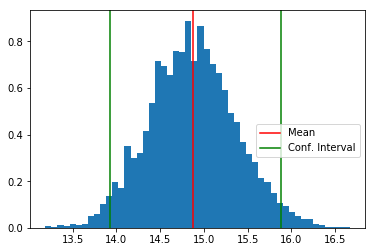

In [5]:
#Getting sampling results
stan_results_1 = stan_model_1.sampling(data=data_1)
lambda_samples = stan_results_1.extract() 

#Confidence Interval
print(
    "Posterior 95% confidence interval for lambda:", np.percentile(lambda_samples['lambda'], [2.5, 97.5]))

# Plotting Histogram
average = mean(lambda_samples['lambda']) 
lower_bound = np.percentile(lambda_samples['lambda'], [2.5])
upper_bound = np.percentile(lambda_samples['lambda'], [97.5])

plt.hist(lambda_samples['lambda'], bins=50, density=True)
plt.axvline(x= average, c='r', label = 'Mean')
plt.axvline(x= upper_bound, c='g', label = 'Conf. Interval')
plt.axvline(x= lower_bound, c='g')
plt.legend(loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5))


Using the confidence interval, this means that we expect the actual number of calls that come in per minute during the 11th hour to be between 13.93 (approximately 14) and 15.88 (approximately 16) 95% of the time.

## Normal likelihood with normal-inverse-gamma prior.

#### Results to compute:

* 95% posterior confidence intervals for the mean μ and variance σ^2 of the data.

* Take 10 samples from your posterior over μ and σ^2 and plot the normal distributions corresponding to them. See Task 3 in the solutions below — you should produce a plot similar the one you find there.

In [42]:
data = np.array([3.54551763569501, 4.23799861761927, 4.72138425951628, -0.692265320368236, 3.04473513808788, 3.10721270732507, 3.42982225852764, 3.12153903971176, 3.60532628639808, 2.46561737557325, 1.64059465916131, 2.4621623937158, 2.76744495617481, 2.11580054750407, 5.14077208608354, 4.90288499104252, 1.43357579078348, 4.78997817363558, 1.93633438207439, 2.43698838097178, 3.95389148701877, 2.4242295507716, 2.90256268679023, 2.90931728045901, 0.658072819386888, 3.05946763895983, 3.42615331539605, 2.68842833004417, 2.35850130765166, 2.20014998540933, 4.73846511350084, 4.19839721414451, 2.11805510171691, -0.572742936038015, 0.389413982010623, 3.87846130744249, 1.34057656890858, 0.7235748351719, 5.11042369840174, 4.00747556696571, 3.18080956726965, 3.24677964069676, 5.1154659863626, 1.80276616697155, 0.305877679021404, -0.449168307882718, 4.63705561194774, 1.37783714058301, 4.9608149859515, 6.7764195802069, 1.75515522922399, 7.04457337435215, 0.625185284955128, 2.25130734369064, 2.19770178119255, 2.16858257249432, 6.25367644481438, 0.116081323476489, 2.06315857864341, 1.82409781471718, 5.15226741230987, 2.03408231293173, -1.12450854337596, 5.03511270642234, 2.03841989653263, 5.80911741751597, 2.31718128783245, 4.97575010580997, 3.34262752222776, -0.786983904253601, 0.777362359850013, 0.975825009321195, 3.76354577515958, 7.27215002907876, 1.35404089480189, 3.76567940257157, 3.48573993343334, 1.85976988586156, 1.93567061960716, 5.31071812003942, 2.96832987672751, 3.32378908637275, 2.61631960054551, 5.80897964052825, 4.95215217171488, 1.32036772796131, 3.79932542233371, 3.08108492766309, 2.6734110081666, -0.14251851138521, 2.48744375588965, 3.98463042123415, 6.32781680028, 4.0029172024315, 4.23210369459457, 1.71412938967325, 5.16492114963802, 2.53409673107906, 4.77346963973334, 3.34088878725551, 4.77681472750664, 3.81135755590976, 1.14054269983137, 1.42057452397702, 0.132142311125433, 7.12577254064672, 4.85422012781764, 4.15745720676399, 4.48763147363348, 1.56060322283629, 2.64821761542887, 1.26655351354548, 4.48497722937931, 4.3286302403783, 4.26157679512625, 4.0597558651364, 5.14051109132496, 2.5660348362221, 1.10764013818617, 0.386889523012303, 3.54150473246237, 3.57480214382351, 1.95150869584847, 2.70688970563118, 2.47971849820016, 6.50838037000679, 4.01511556826974, 1.11562740835344, 5.02637639472439, 4.38184491686864, 5.60423144047386, 2.40067408379298, 5.7849941378344, 2.37225791084559, 6.86031465910273, 4.09214858239736, 6.85994063692621, 3.62202415158781, -1.11220646958158, 3.73920971696866, 3.24533871512216, 1.28724203643002, 0.291152541773164, 0.368630935755111, 6.71607270510525, 5.42278455200833, 5.35188416119281, 2.305874586163, -1.85878097203032, 2.69877382351447, 4.84121860550417, 4.40973060799391, 5.04399320650774, 2.68632252661298, 6.06531610659912, 3.11881325011993, 3.45532087005125, 3.08442259840346, 4.43564424136733, 2.84252623135804, 1.50536798885106, 1.48868622407603, 2.07322837615663, 2.5476910210998, 5.66941808257884, 2.16731067416426, 2.49843958833905, 3.94586413879977, 0.316433764679541, -0.608937441815983, 2.5943436558557, 1.05516869528337, 2.1447601332725, 6.65846634141906, 2.1771555267834, 5.23953812029442, 3.53629759842647, 6.03263538017003, 3.85739159396599, 5.95093453004638, 1.12856987160476, 3.5559912886093, 2.21974864244489, 3.38471394882135, -1.90805399279409, 3.5113699258973, 4.49319955412346, 5.10507952638867, 1.08277895384184, 4.58403638422759, 1.37304994426824, 4.17566975753523, 3.36454182510378, 0.177136582644021, 2.91337423388405, 3.22796455457526, 2.80124198378441, 1.95189718582788, 3.37659263896246, -1.6463045238231])

#Prior hyperparameters
mu = 0       
nu = 0.054    
alpha = 1.12  
beta = 0.4

#Getting data for stan code to a dictionary
data_2 = {
        'mu_p': mu,  
        'nu_p': nu,   
        'alpha_p': alpha,  
        'beta_p': beta,
        'num': len(data),
         'x': data}

In [37]:
#Stan code

stan_code_2 = """

data {
    real<lower=0> mu_p; // prior hyperparameter
    real<lower=0> nu_p; // prior hyperparameter
    real<lower=0> alpha_p; // prior hyperparameter
    real<lower=0> beta_p; // prior hyperparameter
    int<lower=1> num; // len(data)
    real x[num];// data
}

// After discussing with Nicole, I chose to get two parts of the mean and variance and multiply them together to get the normal-inverse-gamma distribution; one part would be gotten from the normal distribution and the other from the inverse gamma distribution.

parameters {
    real<lower=negative_infinity(), upper = positive_infinity()> mu_1; // Part of mean going into the normal distribution
    real<lower=negative_infinity(), upper = positive_infinity()> mu_2; //Part of mean going into the inverse-gamma distribution
    real<lower=0, upper = positive_infinity()> var_1; // Part of variance going into the normal distribution
    real<lower=0, upper = positive_infinity()> var_2; // Part of variance going into the inverse-gamma distribution
}

transformed parameters{
    real<lower=0> mu; // Mean
    real<lower=0> sigma2; // Variance
    mu <- mu_1 * mu_2;
    sigma2 <- var_1 * var_2;
}
model {
    mu_1 ~ normal(mu_p,nu_p);
    mu_2 ~ inv_gamma(alpha_p,beta_p);
    var_1 ~ normal(mu_p,nu_p);
    var_2 ~ inv_gamma(alpha_p,beta_p);
    x ~ normal(mu_1*mu_2, sqrt(var_1*var_2)); // Using normal-inverse-gamma posterior
}

"""

In [38]:
#Running pystan

stan_model = pystan.StanModel(model_code=stan_code_2)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_e5abfe230e6ee3373961818aad5b305e NOW.


In [43]:
#Getting sampling results

stan_results = stan_model.sampling(data=data_2, control={"adapt_delta":0.81})
posterior_samples = stan_results.extract()

#Posterior confidence intervals for mean and variance
print(
    "Posterior 95% confidence interval for mean:",
    np.percentile(posterior_samples['mu'], [2.5, 97.5]))
print(
    "Posterior 95% confidence interval for variance:",
    np.percentile(posterior_samples['sigma2'], [2.5, 97.5]))

('Posterior 95% confidence interval for mean:', array([ 2.78940402,  3.31284255]))
('Posterior 95% confidence interval for variance:', array([ 2.97046142,  4.42479634]))


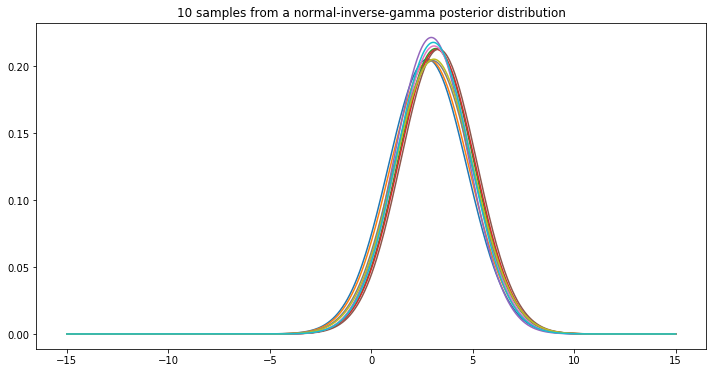

In [45]:
#Getting the 10 samples

results = []
results.append([np.random.choice(posterior_samples['mu'], 10),np.random.choice(posterior_samples['sigma2'], 10)])

#Plotting the samples

num_samples = 10

plt.figure(figsize=(12, 6))
plot_x = np.linspace(-15, 15, 500)

for i in range(num_samples):
    plot_y = stats.norm.pdf(plot_x, loc=results[0][0][i], scale=np.sqrt(results[0][1][i]))
    plt.plot(plot_x, plot_y)
plt.title('%i samples from a normal-inverse-gamma posterior distribution' % num_samples)
plt.show()

## Log-normal HRTEM data

Normal likelihood log-transformed data and using a normal-inverse-gamma prior.

##### Results to compute:
* 95% posterior confidence intervals for the μ and variance σ^2 of the log-transformed data. (Should match results under Task 3 of the solutions.)

* Take 10 samples from your posterior over μ and σ^2 and plot the log-normal distributions corresponding to them. See Task 5 in the solutions below — you should produce a plot similar the one you find there, but with 10 pdfs rather than one.

In [47]:
#Prior parameters
mu_p = 2.3
nu_p = 0.1
alpha_p = 2
beta_p = 5

#Loading and converting data

hrtem = np.loadtxt('hrtem.csv')
log_data = np.log(hrtem)

#Getting data for stan code to a dictionary
hrtem_data = {
        'mu_p': mu_p,  
        'nu_p': nu_p,   
        'alpha_p': alpha_p,  
        'beta_p': beta_p,
        'num': len(log_data),
         'x': log_data}

In [53]:
#Getting sampling results
stan_results_3 = stan_model.sampling(data=hrtem_data) #Using the same Stan code as in the second question,but changed data
posterior_samples_1 = stan_results_3.extract()

#Posterior confidence intervals for mean and variance
print("Posterior 95% confidence interval for mean:", np.percentile(posterior_samples_1['mu'], [2.5, 97.5]))
print("Posterior 95% confidence interval for variance:",np.percentile(posterior_samples_1['sigma2'], [2.5, 97.5]))

('Posterior 95% confidence interval for mean:', array([ 1.83272173,  1.95862678]))
('Posterior 95% confidence interval for variance:', array([ 0.45959759,  0.58828014]))


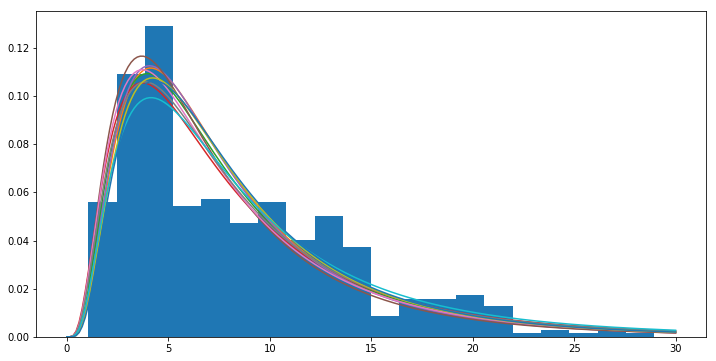

In [52]:
#I checked to see that the mean_map and variance_map from code was the same as that of the mean and variance means
#computed in Stan, so I went ahead to use that for the plots

#Getting the 10 samples
results_hrtem = []
results_hrtem.append([np.random.choice(posterior_samples_1['mu'],10),np.random.choice(posterior_samples_1['sigma2'], 10)])

#Plotting the samples
num_samples = 10

plt.figure(figsize=(12,6))
plt.hist(hrtem, bins=20, density=True)

plot_x = np.linspace(0, 30, 200)
for i in range(num_samples):
    plot_y = stats.lognorm.pdf(plot_x, np.sqrt(results_hrtem[0][1][i]), scale=np.exp(results_hrtem[0][0][i]))
    plt.plot(plot_x, plot_y)
    
plt.show()